# Import important Libraries

In [1]:
import pandas as pd
import json
import os
import re
from pprint import pprint
import numpy as np
from scipy.sparse.linalg import svds
import spacy
from nltk.tokenize import word_tokenize
import pickle as pkl
from bs4 import BeautifulSoup
from nltk.tokenize import ToktokTokenizer
from string import punctuation
from nltk.stem import wordnet
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

unable to import 'smart_open.gcs', disabling that module


# Import dataset

Dataset used from stackoverflow website https://data.stackexchange.com/stackoverflow/query/edit/1197456#resultSets

In [2]:
data_blogs=pd.read_csv(r"C:\Users\rh0339\Downloads\stack_overflow\1.csv")
data_blogs.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,658,46852.0,<p>I want to use a <code>Track-Bar</code> to c...,8.0,...,Rich B,2020-02-28 11:38:30,2020-02-28 11:38:30,Convert Decimal to Double,<c#><floating-point><type-conversion><double><...,13.0,5,49.0,NaN,2012-10-31 16:42:47
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,293,19107.0,<p>I have an absolutely positioned <code>div</...,9.0,...,Rich B,2019-07-19 01:43:04,2019-07-19 01:43:04,Percentage width child element in absolutely p...,<html><css><internet-explorer-7>,6.0,0,11.0,NaN,NaN
2,7,2,NaN,4.0,2008-07-31 22:17:57,NaN,440,NaN,<p>An explicit cast to <code>double</code> lik...,9.0,...,NaN,2019-10-21 14:03:54,2019-10-21 14:03:54,NaN,NaN,NaN,0,NaN,NaN,NaN
3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1819,594316.0,<p>Given a <code>DateTime</code> representing ...,1.0,...,Rich B,2018-04-21 17:48:14,2020-02-29 01:31:43,How do I calculate someone's age in C#?,<c#><.net><datetime>,61.0,7,450.0,NaN,2011-08-16 19:40:43
4,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1488,156068.0,<p>Given a specific <code>DateTime</code> valu...,1.0,...,user2370523,2017-06-04 15:51:19,2019-05-26 02:31:53,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,37.0,4,540.0,NaN,2009-09-04 13:15:59


In [3]:
data_blogs=data_blogs.rename(columns={'Id':'_id','Body':'description','Tags':'tags'})
data_blogs.head()

,_id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,description,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,658,46852.0,<p>I want to use a <code>Track-Bar</code> to c...,8.0,...,Rich B,2020-02-28 11:38:30,2020-02-28 11:38:30,Convert Decimal to Double,<c#><floating-point><type-conversion><double><...,13.0,5,49.0,NaN,2012-10-31 16:42:47
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,293,19107.0,<p>I have an absolutely positioned <code>div</...,9.0,...,Rich B,2019-07-19 01:43:04,2019-07-19 01:43:04,Percentage width child element in absolutely p...,<html><css><internet-explorer-7>,6.0,0,11.0,NaN,NaN
2,7,2,NaN,4.0,2008-07-31 22:17:57,NaN,440,NaN,<p>An explicit cast to <code>double</code> lik...,9.0,...,NaN,2019-10-21 14:03:54,2019-10-21 14:03:54,NaN,NaN,NaN,0,NaN,NaN,NaN
3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1819,594316.0,<p>Given a <code>DateTime</code> representing ...,1.0,...,Rich B,2018-04-21 17:48:14,2020-02-29 01:31:43,How do I calculate someone's age in C#?,<c#><.net><datetime>,61.0,7,450.0,NaN,2011-08-16 19:40:43
4,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1488,156068.0,<p>Given a specific <code>DateTime</code> valu...,1.0,...,user2370523,2017-06-04 15:51:19,2019-05-26 02:31:53,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,37.0,4,540.0,NaN,2009-09-04 13:15:59


In [4]:
data_blogs.shape

(46083, 22)

In [5]:
data_blogs = data_blogs[['_id','tags','description']]
data_tags_1 = data_blogs
data_blogs.head()

,_id,tags,description
0,4,<c#><floating-point><type-conversion><double><...,<p>I want to use a <code>Track-Bar</code> to c...
1,6,<html><css><internet-explorer-7>,<p>I have an absolutely positioned <code>div</...
2,7,NaN,<p>An explicit cast to <code>double</code> lik...
3,9,<c#><.net><datetime>,<p>Given a <code>DateTime</code> representing ...
4,11,<c#><datetime><time><datediff><relative-time-s...,<p>Given a specific <code>DateTime</code> valu...


# NA summary in dataset

In [6]:
def na_summary(df):
    df_null = df.isnull().sum()
    df_null = df_null.to_frame().reset_index()
    df_null = df_null.rename(columns={'index':'Feature', 0:'NA_count'})
    df_null['NA_percentage'] = df_null['NA_count']/df.shape[0]*100
    return df_null
na_summary(data_blogs)

,Feature,NA_count,NA_percentage
0,_id,0,0.000000
1,tags,37086,80.476531
2,description,0,0.000000


In [7]:
data_blogs.dropna(subset=['tags'], inplace=True)
data_blogs.shape

(8997, 3)

In [8]:
data_blogs.head()

,_id,tags,description
0,4,<c#><floating-point><type-conversion><double><...,<p>I want to use a <code>Track-Bar</code> to c...
1,6,<html><css><internet-explorer-7>,<p>I have an absolutely positioned <code>div</...
3,9,<c#><.net><datetime>,<p>Given a <code>DateTime</code> representing ...
4,11,<c#><datetime><time><datediff><relative-time-s...,<p>Given a specific <code>DateTime</code> valu...
6,13,<html><browser><timezone><user-agent><timezone...,<p>Is there a standard way for a web server to...


# Cleaning tags in dataset

In [9]:
def tags_to_list(tags): 
    clean_tags = str(tags).split('>')[:-1]
    tags_filtered = []
    
    for tag in clean_tags:
        tags_filtered.append(tag[1:])
            
    return tags_filtered

In [10]:
data_blogs['tags'] = data_blogs['tags'].apply(lambda x: tags_to_list(x))
data_blogs.head()

,_id,tags,description
0,4,"[c#, floating-point, type-conversion, double, ...",<p>I want to use a <code>Track-Bar</code> to c...
1,6,"[html, css, internet-explorer-7]",<p>I have an absolutely positioned <code>div</...
3,9,"[c#, .net, datetime]",<p>Given a <code>DateTime</code> representing ...
4,11,"[c#, datetime, time, datediff, relative-time-s...",<p>Given a specific <code>DateTime</code> valu...
6,13,"[html, browser, timezone, user-agent, timezone...",<p>Is there a standard way for a web server to...


In [11]:
tags=[]
for i in data_blogs['tags']:
    for j in i:
        if j not in tags:
            tags.append(j)

In [12]:
len(tags)

3595

# Cleaning Dsecription in dataset

In [13]:
def clean_text(text):
    ''' Lowering text and removing undesirable marks

    Parameter:
    
    text: document to be cleaned    
    '''
    
    text = text.lower()
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text) # matches all whitespace characters
    text = text.strip(' ')
    return text

In [14]:
data_blogs['description'] = data_blogs['description'].apply(lambda x: clean_text(x))
data_blogs.head()

,_id,tags,description
0,4,"[c#, floating-point, type-conversion, double, ...",<p>i want to use a <code>track-bar</code> to c...
1,6,"[html, css, internet-explorer-7]",<p>i have an absolutely positioned <code>div</...
3,9,"[c#, .net, datetime]",<p>given a <code>datetime</code> representing ...
4,11,"[c#, datetime, time, datediff, relative-time-s...",<p>given a specific <code>datetime</code> valu...
6,13,"[html, browser, timezone, user-agent, timezone...",<p>is there a standard way for a web server to...


In [15]:
# the text of the post, without tags or markup
data_blogs['description'] = data_blogs['description'].apply(lambda x: BeautifulSoup(x).get_text())
data_blogs.head()

,_id,tags,description
0,4,"[c#, floating-point, type-conversion, double, ...",i want to use a track-bar to change a form's o...
1,6,"[html, css, internet-explorer-7]",i have an absolutely positioned div containing...
3,9,"[c#, .net, datetime]",given a datetime representing a person's birth...
4,11,"[c#, datetime, time, datediff, relative-time-s...","given a specific datetime value, how do i disp..."
6,13,"[html, browser, timezone, user-agent, timezone...",is there a standard way for a web server to be...


In [16]:
def strip_list_noempty(mylist):
    
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    
    return [item for item in newlist if item != '']

In [17]:
def clean_punct(text): 
    ''' Remove all the punctuation from text, unless it's part of an important 
    tag (ex: c++, c#, etc)

    Parameter:
    
    text: document to remove punctuation from it
    '''

    words = token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punctuation))
    remove_punctuation = str.maketrans(' ', ' ', punctuation)
    
    for w in words:
        if w in tags:
            punctuation_filtered.append(w)
        else:
            w = re.sub('^[0-9]*', " ", w)
            punctuation_filtered.append(regex.sub('', w))
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [18]:
token = ToktokTokenizer()

In [19]:
data_blogs['description'] = data_blogs['description'].apply(lambda x: clean_punct(x))
data_blogs.head()

,_id,tags,description
0,4,"[c#, floating-point, type-conversion, double, ...",i want to use a trackbar to change a form s op...
1,6,"[html, css, internet-explorer-7]",i have an absolutely positioned div containing...
3,9,"[c#, .net, datetime]",given a datetime representing a person s birth...
4,11,"[c#, datetime, time, datediff, relative-time-s...",given a specific datetime value how do i displ...
6,13,"[html, browser, timezone, user-agent, timezone...",is there a standard way for a web server to be...


In [20]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
stop_words = nlp.Defaults.stop_words

In [21]:
def stopWordsRemove(text):
    ''' Removing all the english stop words from a corpus

    Parameter:

    text: document to remove stop words from it
    '''

    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [22]:
def lemmatization(texts, allowed_postags):
    ''' It keeps the lemma of the words (lemma is the uninflected form of a word),
    and deletes the underired POS tags
    
    Parameters:
    
    texts (list): text to lemmatize
    allowed_postags (list): list of allowed postags, like NOUN, ADL, VERB, ADV
    '''
    
    lemma = wordnet.WordNetLemmatizer()       
    doc = nlp(texts) 
    texts_out = []
    
    for token in doc:
        
        if str(token) in tags:
            texts_out.append(str(token))
            
        elif token.pos_ in allowed_postags:
            
            if token.lemma_ not in ['-PRON-']:
                texts_out.append(token.lemma_)
                
            else:
                texts_out.append('')

    return texts_out

In [23]:
data_blogs['description'] = data_blogs['description'].apply(lambda x: stopWordsRemove(x)) 
data_blogs.head()

,_id,tags,description
0,4,"[c#, floating-point, type-conversion, double, ...",want use trackbar change form s opacity code d...
1,6,"[html, css, internet-explorer-7]",absolutely positioned div containing children ...
3,9,"[c#, .net, datetime]",given datetime representing person s birthday ...
4,11,"[c#, datetime, time, datediff, relative-time-s...",given specific datetime value display relative...
6,13,"[html, browser, timezone, user-agent, timezone...",standard way web server able determine user s ...


In [24]:
data_blogs['description'] = data_blogs['description'].apply(lambda x: lemmatization(x, ['NOUN', 'ADV']))
data_blogs.head()

,_id,tags,description
0,4,"[c#, floating-point, type-conversion, double, ...","[use, trackbar, change, form, decimal, thisopa..."
1,6,"[html, css, internet-explorer-7]","[absolutely, div, children, relatively, use, c..."
3,9,"[c#, .net, datetime]","[datetime, person, birthday, calculate, age, y..."
4,11,"[c#, datetime, time, datediff, relative-time-s...","[datetime, value, display, time, hour, ago, da..."
6,13,"[html, browser, timezone, user-agent, timezone...","[way, web, server, determine, timezone, web, p..."


In [25]:
data_blogs['new_tags'] = data_blogs['tags']+data_blogs['description']
data_blogs = data_blogs.drop(['tags','description'], axis = 1)
data_blogs.head()

,_id,new_tags
0,4,"[c#, floating-point, type-conversion, double, ..."
1,6,"[html, css, internet-explorer-7, absolutely, d..."
3,9,"[c#, .net, datetime, datetime, person, birthda..."
4,11,"[c#, datetime, time, datediff, relative-time-s..."
6,13,"[html, browser, timezone, user-agent, timezone..."


# Word Embedding

In [26]:
text=[]
for i in data_blogs['new_tags']:
    text.append(i)

In [27]:
id2word = corpora.Dictionary(text)
corpus = [id2word.doc2bow(i) for i in text]

In [28]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[('application', 1),
  ('build', 1),
  ('c#', 1),
  ('change', 1),
  ('code', 1),
  ('control', 1),
  ('decimal', 3),
  ('double', 3),
  ('error', 1),
  ('fine', 1),
  ('floating-point', 1),
  ('form', 1),
  ('implicitly', 1),
  ('project', 1),
  ('thisopacity', 1),
  ('trackbar', 1),
  ('tran', 2),
  ('type', 1),
  ('type-conversion', 1),
  ('use', 1),
  ('vb.net', 1)],
 [('use', 1),
  ('absolutely', 1),
  ('area', 1),
  ('child', 3),
  ('children', 1),
  ('collapse', 1),
  ('css', 2),
  ('div', 2),
  ('firefox', 1),
  ('fix', 1),
  ('html', 1),
  ('internet-explorer-7', 1),
  ('parent', 1),
  ('percentage', 1),
  ('relatively', 2),
  ('safari', 1),
  ('specification', 1),
  ('width', 1)]]

In [29]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1)]]


# Applying LDA for topic modelling

In [30]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)

In [31]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.085*"error" + 0.053*"c++" + 0.036*"problem" + 0.035*"process" + '
  '0.035*"find" + 0.034*"message" + 0.032*"program" + 0.028*"question" + '
  '0.028*"edit" + 0.023*"output"'),
 (1,
  '0.221*"xml" + 0.124*"ruby" + 0.111*"format" + 0.059*"resources" + '
  '0.057*"approach" + 0.048*"better" + 0.027*"math" + 0.025*"comments" + '
  '0.018*"part" + 0.015*"csv"'),
 (2,
  '0.223*"page" + 0.174*"asp.net" + 0.088*"site" + 0.066*"display" + '
  '0.053*"controls" + 0.044*"user" + 0.042*"menu" + 0.029*"view" + '
  '0.022*"dynamically" + 0.017*"apache-flex"'),
 (3,
  '0.251*"file" + 0.045*"end" + 0.036*"directory" + 0.028*"folder" + '
  '0.028*"script" + 0.022*"size" + 0.021*"session" + 0.020*"line" + '
  '0.020*"way" + 0.020*"copy"'),
 (4,
  '0.096*"test" + 0.086*"php" + 0.083*"linux" + 0.047*"server" + '
  '0.046*"testing" + 0.044*"line" + 0.038*"command" + 0.038*"option" + '
  '0.032*"security" + 0.031*"place"'),
 (5,
  '0.129*"function" + 0.107*"return" + 0.102*"value" + 0.076*"text" 

# Computing perplexity and coherence score for model evaluation

In [32]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -14.173961245684652

Coherence Score:  0.3705296334554257


# Applying model by varying number of topics to improve model performance

In [33]:
def compute_values(dictionary, corpus, texts, start, limit, step):
    perpexlity = []
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        per = model.log_perplexity(corpus)
        perpexlity.append(per)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, perpexlity, coherence_values

In [35]:
model_list, perpexlity, coherence_values = compute_values(dictionary=id2word, corpus=corpus, texts=text, start=5, limit=30, step=5)

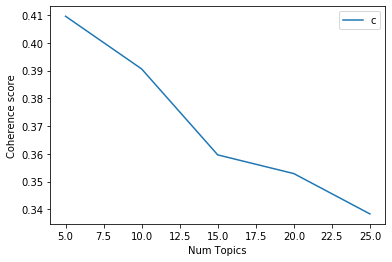

In [36]:
limit=30; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

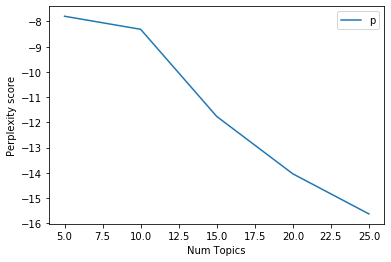

In [37]:
limit=30; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, perpexlity)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

From the above graphs it is clear that best model is at num_topics=5 as it is having low perplexity and high coherence score

# Evaluating best model for unseen text

In [38]:
new_model = model_list[0]

In [39]:
pprint(new_model.print_topics())

[(0,
  '0.051*"error" + 0.023*"linux" + 0.021*"service" + 0.021*"message" + '
  '0.014*"windows" + 0.014*"output" + 0.014*"server" + 0.012*"window" + '
  '0.011*"client" + 0.010*"api"'),
 (1,
  '0.045*"class" + 0.036*"string" + 0.035*"c" + 0.033*"java" + 0.027*"object" '
  '+ 0.027*"function" + 0.022*"c++" + 0.022*"return" + 0.021*"type" + '
  '0.018*"javascript"'),
 (2,
  '0.024*"page" + 0.023*"text" + 0.023*"d" + 0.021*"table" + 0.019*"value" + '
  '0.019*"asp.net" + 0.016*"xml" + 0.015*"select" + 0.014*"set" + '
  '0.014*"html"'),
 (3,
  '0.031*"file" + 0.018*"application" + 0.017*"way" + 0.016*"database" + '
  '0.014*"server" + 0.013*".net" + 0.013*"time" + 0.012*"user" + 0.011*"datum" '
  '+ 0.010*"use"'),
 (4,
  '0.028*"test" + 0.026*"python" + 0.025*"php" + 0.017*"perl" + 0.014*"site" + '
  '0.014*"ruby" + 0.014*"testing" + 0.012*"external" + 0.012*"module" + '
  '0.011*"search"')]


In [40]:
new_doc = ["page","text","service","site","value"]

In [41]:
dictionary = id2word.doc2bow(new_doc)
dictionary

[(53, 1), (59, 1), (86, 1), (271, 1), (308, 1)]

In [42]:
vector = new_model.get_document_topics(dictionary)

In [43]:
for i in vector:
    print(i)

(0, 0.15092614)
(1, 0.106227964)
(2, 0.336502)
(3, 0.25065318)
(4, 0.15569076)


Conclusion: In the above cell you can see the probability of topic associated with text. Topic 2 is having largest probability of 0.33 association. 